In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys,os,argparse



In [2]:

path = '/home/peter/Desktop/competition_results/'

fileName = 'test2try2.csv'  

df = pd.read_csv(path+fileName, skiprows=1, names=['time (s)', 'ch0 Radios(V)', 'ch1 Actuators(V)', 'ch2 Sensors(V)', 'ch3 Processor(V)'])


#df.head(10)


<Figure size 432x288 with 0 Axes>

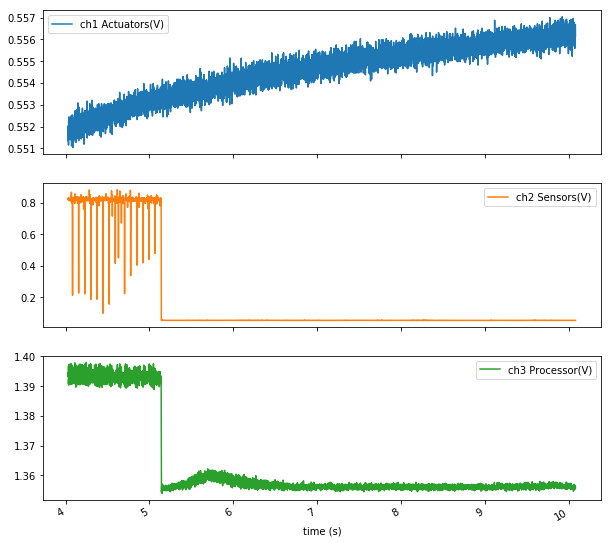

In [10]:

def plotTimeRange(a=0, b=25):
    secondRange = df.shape[0]/25
    
    plt.figure()
    df.iloc[a*secondRange:b*secondRange,:].plot(x='time (s)', y=['ch1 Actuators(V)', 'ch2 Sensors(V)', 'ch3 Processor(V)'], subplots=True, figsize=(10,10))

plotTimeRange(4,10)

In [4]:


def calcEnergy(colName):
    r = .4
    #totalRaw = (df[colName].sum())*3.3/25/r
    
    if colName.find('cessor') >=0:
        r = 1.33  
    totalRaw = (df[df[colName]>.1].sum()[colName])*3.3/25/r
    
    delta = df['time (s)'].iloc[-1]/df.shape[0]
    energy = totalRaw*delta   
    print("{0:.5f} J".format(energy))
    return energy
    


In [5]:
processorEnergy = calcEnergy('ch3 Processor(V)')

3.41009 J


In [6]:
radioEnergy = calcEnergy('ch2 Sensors(V)')

1.73560 J


In [7]:
totalEnergy = processorEnergy + radioEnergy

print('total energy {0:.5f} J'.format(totalEnergy))

total energy 5.14568 J
